# **MIRACLE7 E-Commerce Shipping Data in Data Preprocessing**

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/salsmardhiyah/EcommerceShippingData/main/E-Commerce%20Shipping%20Data-Train.csv'
df = pd.read_csv(url)

df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10354,10355,C,Ship,3,1,175,3,low,M,6,4695,0
9649,9650,F,Ship,5,2,192,7,medium,M,2,4045,1
793,794,F,Ship,4,3,257,3,medium,M,5,2489,1
914,915,A,Ship,3,1,255,2,medium,M,42,3459,1
1346,1347,A,Road,4,4,145,3,low,F,43,1651,1


## Data Preprocessing

### Missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Data berikut tidak memiliki missing values sama sekali.

### Duplicated Data

In [6]:
df.duplicated().sum()

0

Data berikut tidak memiliki data yang kembar / duplicated data.

### Handle Outliers

Berdasarkan dengan keputusan yang dibahas pada Stage 1, kami menggunakan teknik menghapus outlier dengan menggunakan **Z-Score** karena outliers yang ada pada kolom **Discount offered** merupakan data yang penting untuk digunakan di model machine learning nanti. Dalam menggunakan teknik Z-Score, kami memutuskan **0.3%** data yang memiliki nilai ekstrim dihapus.

In [7]:
z_scores = np.abs(stats.zscore(df['Discount_offered']))
filtered_entries = (z_scores < 3)
df2 = df[filtered_entries]

df2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Feature Transformation

Persebaran data pada kolom **Discount offered** termasuk tipe persebaran **Positively skewed.** Oleh karena itu, dibutuhkan Feature Transformation berupa **Log Transformation** agar data tersebut lebih ke arah **Normal Distribution.**

<AxesSubplot:xlabel='discount_log', ylabel='Density'>

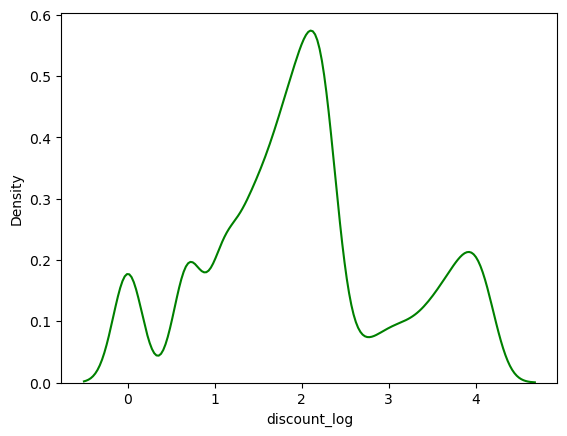

In [8]:
df['discount_log'] = np.log(df['Discount_offered'])

sns.kdeplot(df['discount_log'], color='green')

### Feature Encoding

## Feature Engineering